<a href="https://colab.research.google.com/github/tgiovansili/ML_project/blob/main/notebooks-master/Module2/02a_basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[![Dataflowr](https://raw.githubusercontent.com/dataflowr/website/master/_assets/dataflowr_logo.png)](https://dataflowr.github.io/website/)

# Module 2: PyTorch tensors and automatic differentiation

[Video timestamp](https://youtu.be/BmAS8IH7n3c?t=103)

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import torch
import numpy as np

In [2]:
torch.__version__

'2.9.0+cu128'

Tensors are used to encode the signal to process, but also the internal states and parameters of models.

**Manipulating data through this constrained structure allows to use CPUs and GPUs at peak performance.**

Construct a 3x5 matrix, uninitialized:

In [3]:
x = torch.empty(3,5)
print(x.dtype)
print(x)

torch.float32
tensor([[-4.5136e-30,  4.5539e-41, -4.5799e-30,  4.5539e-41, -4.5322e-30],
        [ 4.5539e-41, -4.5108e-30,  4.5539e-41, -4.5108e-30,  4.5539e-41],
        [ 1.6385e-38,  0.0000e+00,  1.5173e-38,  0.0000e+00, -4.5317e-30]])


If you got an error this [stackoverflow link](https://stackoverflow.com/questions/50617917/overflow-when-unpacking-long-pytorch) might be useful...

In [4]:
x = torch.randn(3,5)
print(x)

tensor([[ 0.1473,  0.9084, -1.1990,  0.3949, -0.3321],
        [-0.5256, -0.0724, -0.6714, -0.7077,  0.6888],
        [-1.6952,  0.0389,  2.8125, -0.1097, -1.5156]])


In [5]:
print(x.size())

torch.Size([3, 5])


torch.Size is in fact a [tuple](https://docs.python.org/3/tutorial/datastructures.html#tuples-and-sequences), so it supports the same operations.

[Video timestamp](https://youtu.be/BmAS8IH7n3c?t=272)

In [6]:
x.size()[1]

5

In [7]:
x.size() == (3,5)

True

### Bridge to numpy

[Video timestamp](https://youtu.be/BmAS8IH7n3c?t=325)

In [8]:
y = x.numpy()
print(y)

[[ 0.1472556   0.9084175  -1.1989805   0.39487493 -0.3320711 ]
 [-0.52563024 -0.07238369 -0.67144454 -0.70765465  0.68881845]
 [-1.695244    0.03891685  2.8125296  -0.10968108 -1.5155861 ]]


In [9]:
a = np.ones(5)
b = torch.from_numpy(a)
print(a.dtype)
print(b)

float64
tensor([1., 1., 1., 1., 1.], dtype=torch.float64)


In [10]:
c = b.long()
print(c.dtype, c)
print(b.dtype, b)

torch.int64 tensor([1, 1, 1, 1, 1])
torch.float64 tensor([1., 1., 1., 1., 1.], dtype=torch.float64)


In [11]:
xr = torch.randn(3, 5)
print(xr.dtype, xr)

torch.float32 tensor([[ 1.6620, -0.0483, -0.1053, -0.6941, -0.5870],
        [ 1.3270,  2.7441,  0.7080,  0.0258,  0.9842],
        [-0.6038, -0.2055, -1.5511, -0.7077,  0.2426]])


In [12]:
resb = xr + b
resb

tensor([[ 2.6620,  0.9517,  0.8947,  0.3059,  0.4130],
        [ 2.3270,  3.7441,  1.7080,  1.0258,  1.9842],
        [ 0.3962,  0.7945, -0.5511,  0.2923,  1.2426]], dtype=torch.float64)

In [13]:
resc = xr + c
resc

tensor([[ 2.6620,  0.9517,  0.8947,  0.3059,  0.4130],
        [ 2.3270,  3.7441,  1.7080,  1.0258,  1.9842],
        [ 0.3962,  0.7945, -0.5511,  0.2923,  1.2426]])

Be careful with types!

In [14]:
resb == resc

tensor([[False, False, False,  True,  True],
        [False,  True, False, False, False],
        [ True, False,  True,  True, False]])

In [15]:
torch.set_printoptions(precision=10)

In [16]:
resb[0,1]

tensor(0.9516968913, dtype=torch.float64)

In [17]:
resc[0,1]

tensor(0.9516968727)

In [18]:
resc[0,1].dtype

torch.float32

In [19]:
xr[0,1]

tensor(-0.0483031087)

In [20]:
torch.set_printoptions(precision=4)

### [Broadcasting](https://numpy.org/doc/stable/user/basics.broadcasting.html)

[Video timestamp](https://youtu.be/BmAS8IH7n3c?t=670)

Broadcasting automagically expands dimensions by replicating coefficients, when it is necessary to perform operations.

1. If one of the tensors has fewer dimensions than the other, it is reshaped by adding as many dimensions of size 1 as necessary in the front; then
2. for every mismatch, if one of the two tensor is of size one, it is expanded along this axis by replicating  coefficients.

If there is a tensor size mismatch for one of the dimension and neither of them is one, the operation fails.

In [21]:
A = torch.tensor([[1.], [2.], [3.], [4.]])
print(A.size())
B = torch.tensor([[5., -5., 5., -5., 5.]])
print(B.size())
C = A + B

torch.Size([4, 1])
torch.Size([1, 5])


In [22]:
C

tensor([[ 6., -4.,  6., -4.,  6.],
        [ 7., -3.,  7., -3.,  7.],
        [ 8., -2.,  8., -2.,  8.],
        [ 9., -1.,  9., -1.,  9.]])

The original (column-)vector
\begin{eqnarray*}
A = \left( \begin{array}{c}
1\\
2\\
3\\
4\\
\end{array}\right)
\end{eqnarray*}
is transformed into the matrix
\begin{eqnarray*}
A = \left( \begin{array}{ccccc}
1&1&1&1&1\\
2&2&2&2&2\\
3&3&3&3&3\\
4&4&4&4&4
\end{array}\right)
\end{eqnarray*}
and the original (row-)vector
\begin{eqnarray*}
B = (5,-5,5,-5,5)
\end{eqnarray*}
is transformed into the matrix
\begin{eqnarray*}
B = \left( \begin{array}{ccccc}
5&-5&5&-5&5\\
5&-5&5&-5&5\\
5&-5&5&-5&5\\
5&-5&5&-5&5
\end{array}\right)
\end{eqnarray*}
so that summing these matrices gives:
\begin{eqnarray*}
A+B = \left( \begin{array}{ccccc}
6&-4&6&-4&6\\
7&-3&7&-3&7\\
8&-2&8&-2&8\\
9&-1&9&-1&9
\end{array}\right)
\end{eqnarray*}

### In-place modification

[Video timestamp](https://youtu.be/BmAS8IH7n3c?t=875)

In [23]:
x

tensor([[ 0.1473,  0.9084, -1.1990,  0.3949, -0.3321],
        [-0.5256, -0.0724, -0.6714, -0.7077,  0.6888],
        [-1.6952,  0.0389,  2.8125, -0.1097, -1.5156]])

In [24]:
xr

tensor([[ 1.6620, -0.0483, -0.1053, -0.6941, -0.5870],
        [ 1.3270,  2.7441,  0.7080,  0.0258,  0.9842],
        [-0.6038, -0.2055, -1.5511, -0.7077,  0.2426]])

In [25]:
print(x+xr)

tensor([[ 1.8093,  0.8601, -1.3043, -0.2992, -0.9191],
        [ 0.8014,  2.6717,  0.0366, -0.6819,  1.6731],
        [-2.2990, -0.1666,  1.2615, -0.8174, -1.2730]])


In [26]:
x.add_(xr)
print(x)

tensor([[ 1.8093,  0.8601, -1.3043, -0.2992, -0.9191],
        [ 0.8014,  2.6717,  0.0366, -0.6819,  1.6731],
        [-2.2990, -0.1666,  1.2615, -0.8174, -1.2730]])


Any operation that mutates a tensor in-place is post-fixed with an ```_```

For example: ```x.fill_(y)```, ```x.t_()```, will change ```x```.

In [27]:
print(x.t())

tensor([[ 1.8093,  0.8014, -2.2990],
        [ 0.8601,  2.6717, -0.1666],
        [-1.3043,  0.0366,  1.2615],
        [-0.2992, -0.6819, -0.8174],
        [-0.9191,  1.6731, -1.2730]])


In [28]:
x.t_()
print(x)

tensor([[ 1.8093,  0.8014, -2.2990],
        [ 0.8601,  2.6717, -0.1666],
        [-1.3043,  0.0366,  1.2615],
        [-0.2992, -0.6819, -0.8174],
        [-0.9191,  1.6731, -1.2730]])


### Shared memory

[Video timestamp](https://youtu.be/BmAS8IH7n3c?t=990)

Also be careful, changing the torch tensor modify the numpy array and vice-versa...

This is explained in the PyTorch documentation [here](https://pytorch.org/docs/stable/torch.html#torch.from_numpy):
The returned tensor by `torch.from_numpy` and ndarray share the same memory. Modifications to the tensor will be reflected in the ndarray and vice versa.

In [29]:
a = np.ones(5)
b = torch.from_numpy(a)
print(b)

tensor([1., 1., 1., 1., 1.], dtype=torch.float64)


In [30]:
a[2] = 0
print(b)

tensor([1., 1., 0., 1., 1.], dtype=torch.float64)


In [31]:
b[3] = 5
print(a)

[1. 1. 0. 5. 1.]


### Cuda

[Video timestamp](https://youtu.be/BmAS8IH7n3c?t=1120)

In [32]:
torch.cuda.is_available()

True

In [33]:
#device = torch.device('cpu')
device = torch.device('cuda') # Uncomment this to run on GPU

In [34]:
x.device

device(type='cpu')

In [35]:
# let us run this cell only if CUDA is available
# We will use ``torch.device`` objects to move tensors in and out of GPU
if torch.cuda.is_available():
    y = torch.ones_like(x, device=device)  # directly create a tensor on GPU
    x = x.to(device)                       # or just use strings ``.to("cuda")``
    z = x + y
    print(z,z.type())
    print(z.to("cpu", torch.double))       # ``.to`` can also change dtype together!

tensor([[ 2.8093,  1.8014, -1.2990],
        [ 1.8601,  3.6717,  0.8334],
        [-0.3043,  1.0366,  2.2615],
        [ 0.7008,  0.3181,  0.1826],
        [ 0.0809,  2.6731, -0.2730]], device='cuda:0') torch.cuda.FloatTensor
tensor([[ 2.8093,  1.8014, -1.2990],
        [ 1.8601,  3.6717,  0.8334],
        [-0.3043,  1.0366,  2.2615],
        [ 0.7008,  0.3181,  0.1826],
        [ 0.0809,  2.6731, -0.2730]], dtype=torch.float64)


In [36]:
x = torch.randn(1)
x = x.to(device)

In [37]:
x.device

device(type='cuda', index=0)

In [38]:
# the following line is only useful if CUDA is available
x = x.data
print(x)
print(x.item())
print(x.cpu().numpy())

tensor([1.6223], device='cuda:0')
1.6223363876342773
[1.6223364]


# Simple interfaces to standard image data-bases

[Video timestamp](https://youtu.be/BmAS8IH7n3c?t=1354)

An example, the [CIFAR10](https://pytorch.org/docs/stable/torchvision/datasets.html#torchvision.datasets.CIFAR10) dataset.

In [39]:
import torchvision

data_dir = 'content/data'

cifar = torchvision.datasets.CIFAR10(data_dir, train = True, download = True)
cifar.data.shape

100%|██████████| 170M/170M [00:05<00:00, 30.9MB/s]


(50000, 32, 32, 3)

Documentation about the [`permute`](https://pytorch.org/docs/stable/tensors.html#torch.Tensor.permute) operation.

In [40]:
x = torch.from_numpy(cifar.data).permute(0,3,1,2).float()
x = x / 255
print(x.type(), x.size(), x.min().item(), x.max().item())

torch.FloatTensor torch.Size([50000, 3, 32, 32]) 0.0 1.0


Documentation about the [`narrow(input, dim, start, length)`](https://pytorch.org/docs/stable/torch.html#torch.narrow) operation.

In [41]:
# Narrows to the first images, converts to float
x = torch.narrow(x, 0, 0, 48)

In [42]:
x.shape

torch.Size([48, 3, 32, 32])

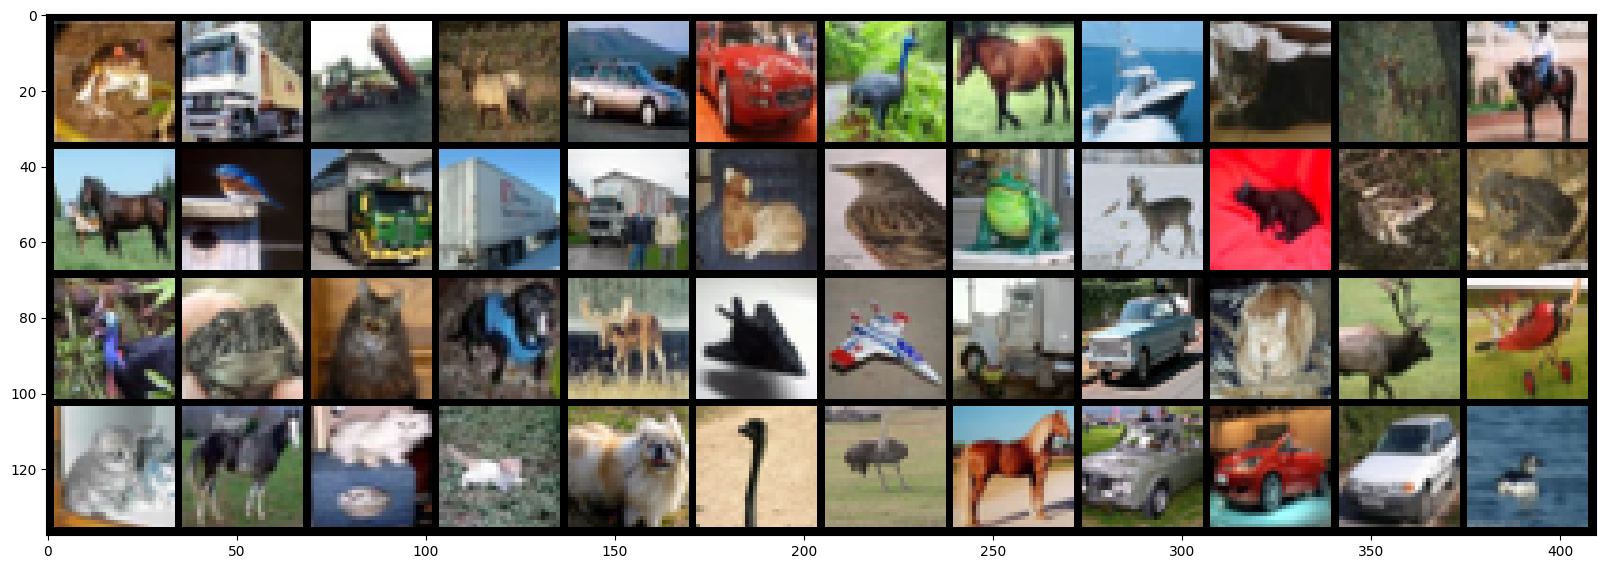

In [43]:
# Showing images
def show(img):
    npimg = img.numpy()
    plt.figure(figsize=(20,10))
    plt.imshow(np.transpose(npimg, (1,2,0)), interpolation='nearest')

show(torchvision.utils.make_grid(x, nrow = 12))

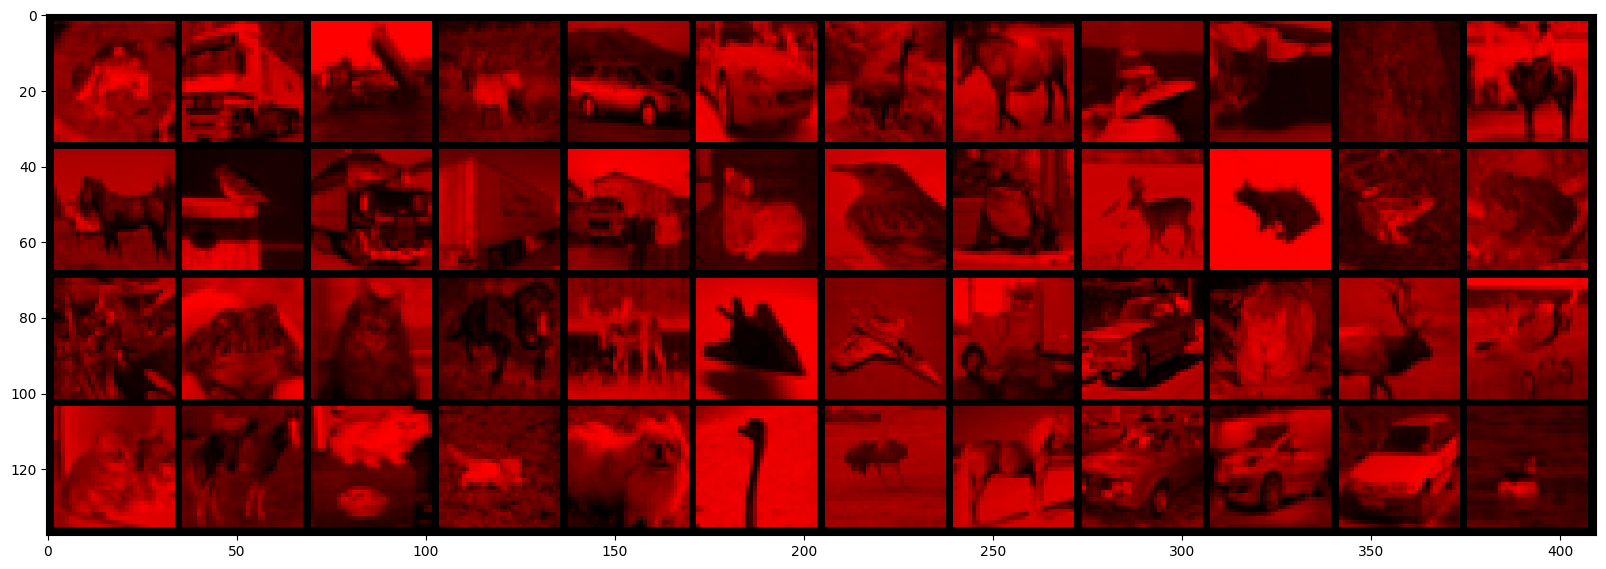

In [44]:
# Kills the green and blue channels
x.narrow(1, 1, 2).fill_(0)
show(torchvision.utils.make_grid(x, nrow = 12))

# Autograd: automatic differentiation

[Video timestamp](https://youtu.be/Z6H3zakmn6E?t=40)

When executing tensor operations, PyTorch can automatically construct on-the-fly the graph of operations to compute the gradient of any quantity with respect to any tensor involved.

To be more concrete, we introduce the following example: we consider parameters $w\in \mathbb{R}$ and $b\in \mathbb{R}$ with the corresponding function:
\begin{eqnarray*}
\ell = \left(\exp(wx+b) - y^* \right)^2
\end{eqnarray*}

Our goal here, will be to compute the following partial derivatives:
\begin{eqnarray*}
\frac{\partial \ell}{\partial w}\mbox{ and, }\frac{\partial \ell}{\partial b}.
\end{eqnarray*}

The reason for doing this will be clear when you will solve the practicals for this lesson!

You can decompose this function as a composition of basic operations. This is call the forward pass on the graph of operations.
![backprop1](https://dataflowr.github.io/notebooks/Module2/img/backprop1.png)

Let say we start with our model in `numpy`:

In [63]:
w = np.array([0.5])
b = np.array([2])
xx = np.array([0.5])#np.arange(0,1.5,.5)

transform these into `tensor`:

In [64]:
xx_t = torch.from_numpy(xx)
w_t = torch.from_numpy(w)
b_t = torch.from_numpy(b)

[Video timestamp](https://youtu.be/Z6H3zakmn6E?t=224)

A `tensor` has a Boolean field `requires_grad`, set to `False` by default, which states if PyTorch should build the graph of operations so that gradients with respect to it can be computed.

In [65]:
w_t.requires_grad

False

We want to take derivative with respect to $w$ so we change this value:

In [66]:
w_t.requires_grad_(True)

tensor([0.5000], dtype=torch.float64, requires_grad=True)

We want to do the same thing for $b$ but the following line will produce an error!

In [67]:
b_t.requires_grad_(True)

RuntimeError: only Tensors of floating point dtype can require gradients

Reading the error message should allow you to correct the mistake!

In [68]:
dtype = torch.float64

In [69]:
b_t = b_t.type(dtype)

In [70]:
b_t.requires_grad_(True)

tensor([2.], dtype=torch.float64, requires_grad=True)

[Video timestamp](https://youtu.be/Z6H3zakmn6E?t=404)

We now compute the function:

In [71]:
def fun(x,ystar):
    y = torch.exp(w_t*x+b_t)
    print(y)
    return torch.sum((y-ystar)**2)

ystar_t = torch.randn_like(xx_t)
l_t = fun(xx_t,ystar_t)

tensor([9.4877], dtype=torch.float64, grad_fn=<ExpBackward0>)


In [72]:
l_t

tensor(58.5269, dtype=torch.float64, grad_fn=<SumBackward0>)

In [73]:
l_t.requires_grad

True

After the computation is finished, i.e. *forward pass*, you can call ```.backward()``` and have all the gradients computed automatically.

In [74]:
print(w_t.grad)

None


In [75]:
l_t.backward()

In [76]:
print(w_t.grad)
print(b_t.grad)

tensor([72.5839], dtype=torch.float64)
tensor([145.1678], dtype=torch.float64)


[Video timestamp](https://youtu.be/Z6H3zakmn6E?t=545)

Let's try to understand these numbers...

![backprop2](https://dataflowr.github.io/notebooks/Module2/img/backprop2.png)

In [77]:
yy_t = torch.exp(w_t*xx_t+b_t)
print(torch.sum(2*(yy_t-ystar_t)*yy_t*xx_t))
print(torch.sum(2*(yy_t-ystar_t)*yy_t))

tensor(72.5839, dtype=torch.float64, grad_fn=<SumBackward0>)
tensor(145.1678, dtype=torch.float64, grad_fn=<SumBackward0>)


`tensor.backward()` accumulates the gradients in  the `grad` fields  of tensors.

In [78]:
l_t = fun(xx_t,ystar_t)
l_t.backward()

tensor([9.4877], dtype=torch.float64, grad_fn=<ExpBackward0>)


In [79]:
print(w_t.grad)
print(b_t.grad)

tensor([145.1678], dtype=torch.float64)
tensor([290.3355], dtype=torch.float64)


By default, `backward` deletes the computational graph when it is used so that you will get an error below:

In [80]:
l_t.backward()

RuntimeError: Trying to backward through the graph a second time (or directly access saved tensors after they have already been freed). Saved intermediate values of the graph are freed when you call .backward() or autograd.grad(). Specify retain_graph=True if you need to backward through the graph a second time or if you need to access saved tensors after calling backward.

In [81]:
# Manually zero the gradients
w_t.grad.data.zero_()
b_t.grad.data.zero_()
l_t = fun(xx_t,ystar_t)
l_t.backward(retain_graph=True)
l_t.backward()
print(w_t.grad)
print(b_t.grad)

tensor([9.4877], dtype=torch.float64, grad_fn=<ExpBackward0>)
tensor([145.1678], dtype=torch.float64)
tensor([290.3355], dtype=torch.float64)


The gradients must be set to zero manually. Otherwise they will cumulate across several _.backward()_ calls.
This accumulating behavior is desirable in particular to compute the gradient of a loss summed over several “mini-batches,” or the gradient of a sum of losses.

In [ ]:
[![Dataflowr](https://raw.githubusercontent.com/dataflowr/website/master/_assets/dataflowr_logo.png)](https://dataflowr.github.io/website/)